In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
for file in os.listdir("energies"):
    if file.endswith(".csv"):
        df = pd.read_csv(os.path.join("energies", file), sep=";", header=None)
        df.drop([1, 4], axis=1, inplace=True)
        df = df[df[0].isin(["C++", "Go", "Java", "JavaScript", "OCaml", "Python"])].reset_index(drop=True)

        df_m = df.groupby(0).mean()
        df_m.to_csv(os.path.join("energies", "avg", file))

In [3]:
def formating(s):
    ss = s.split("-")
    for i in range(len(ss)):
        ss[i] = ss[i][0].capitalize() + ss[i][1:]
    return ''.join(ss)


tasks = ["ABC-Problem", "Caesar-cipher", "Factorial", "Fibonacci-sequence", "Greatest-common-divisor", "Remove-duplicate-elements", "Sieve-of-Eratosthenes"]

<Figure size 1200x600 with 0 Axes>

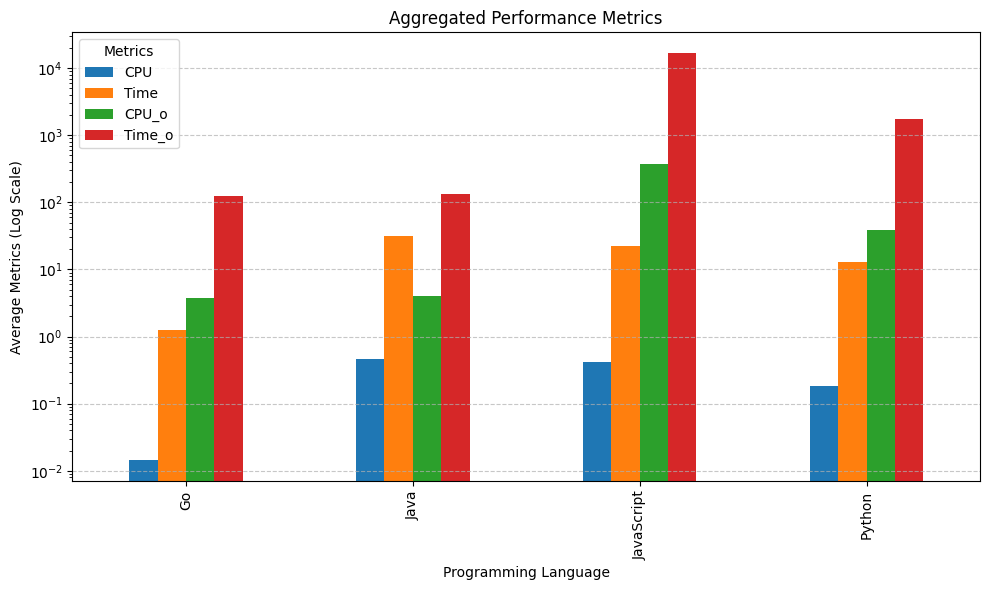

<Figure size 1200x600 with 0 Axes>

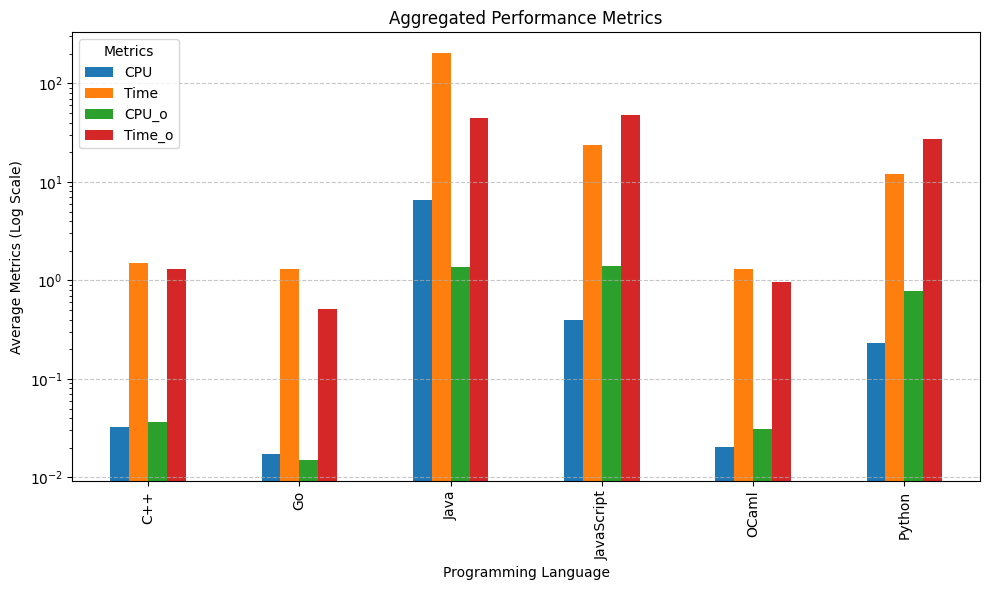

<Figure size 1200x600 with 0 Axes>

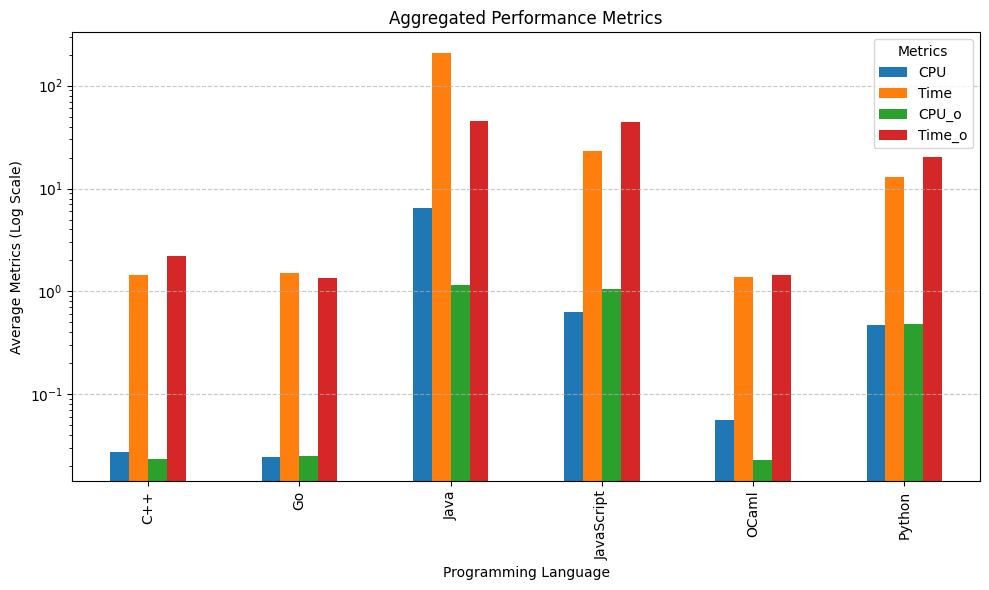

<Figure size 1200x600 with 0 Axes>

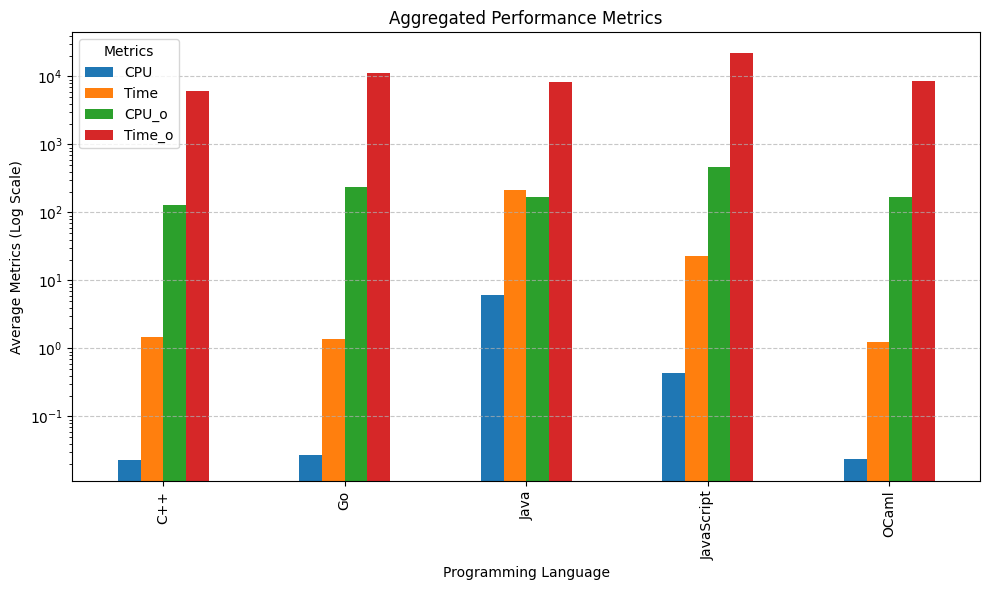

<Figure size 1200x600 with 0 Axes>

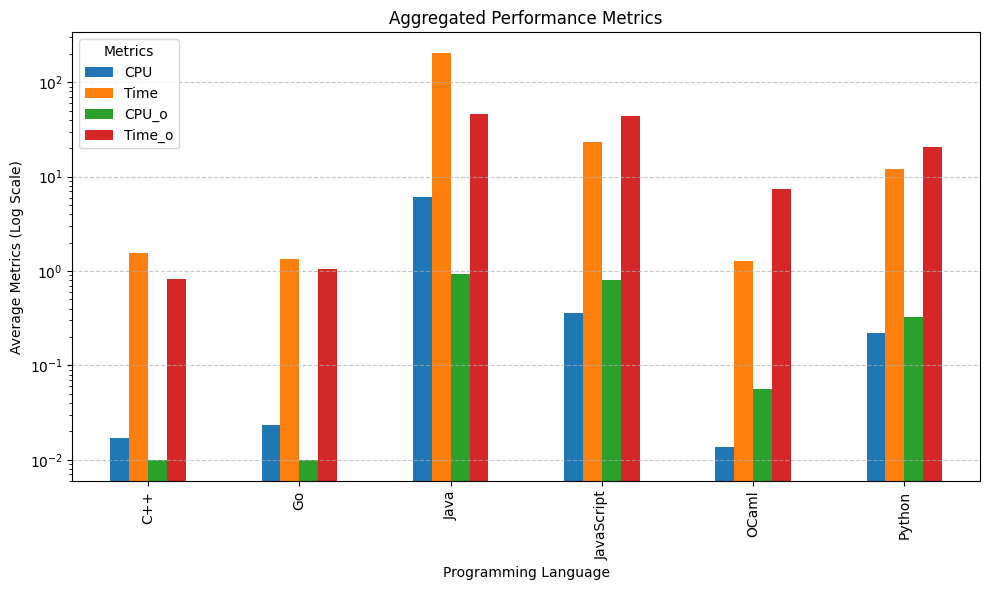

<Figure size 1200x600 with 0 Axes>

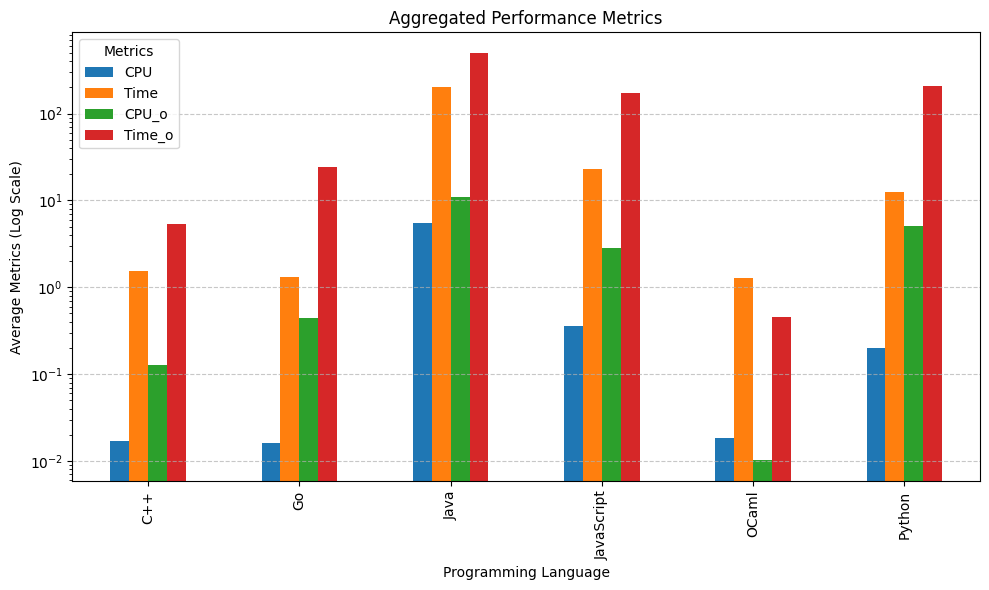

<Figure size 1200x600 with 0 Axes>

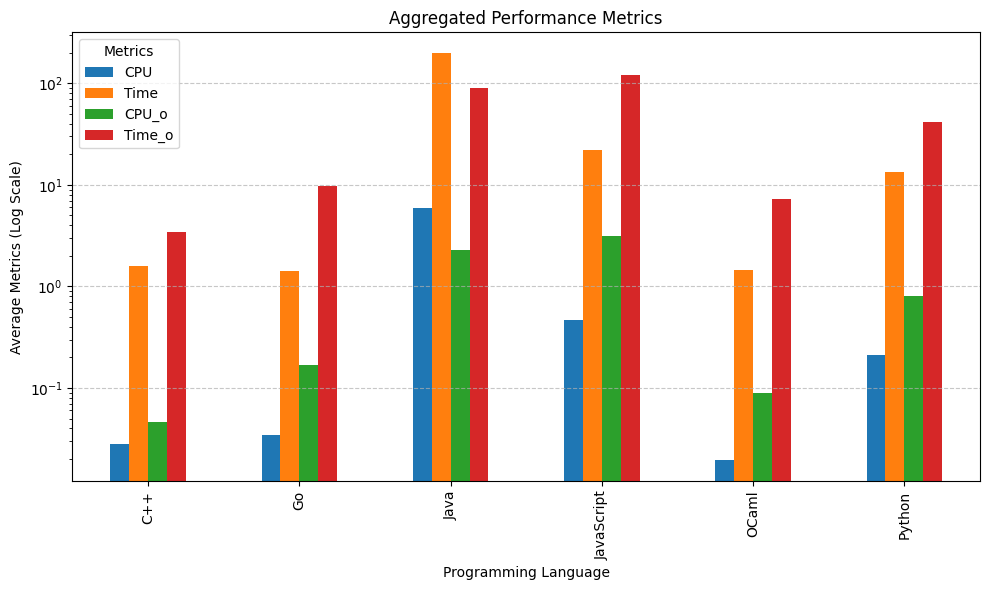

In [4]:
for task in tasks:
    df1 = pd.read_csv(os.path.join("energies/avg", task + ".csv"))
    df2 = pd.read_csv(os.path.join("../results", formating(task) + ".csv"))
    df1.columns = df2.columns
    df2 = df2[df2['Language'].isin(df1['Language'])]
    df = pd.merge(df2, df1, how="inner", on="Language", suffixes=("", "_o"))
    df.drop(["GPU", "DRAM", "GPU_o", "DRAM_o"], axis=1, inplace=True)

    plt.figure(figsize=(12, 6))
    df.plot(kind='bar', x='Language', y=["CPU", "Time", "CPU_o", "Time_o"], figsize=(10, 6), logy=True)
    plt.title('Aggregated Performance Metrics')
    plt.ylabel('Average Metrics (Log Scale)')
    plt.xlabel('Programming Language')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Metrics")
    plt.tight_layout()
    plt.savefig(os.path.join("graph", task + ".png"))
    # plt.show()